max logReg an Weight = 9: 0.4842693425292115
max RF an Weight = 8: 0.49941402834242554


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

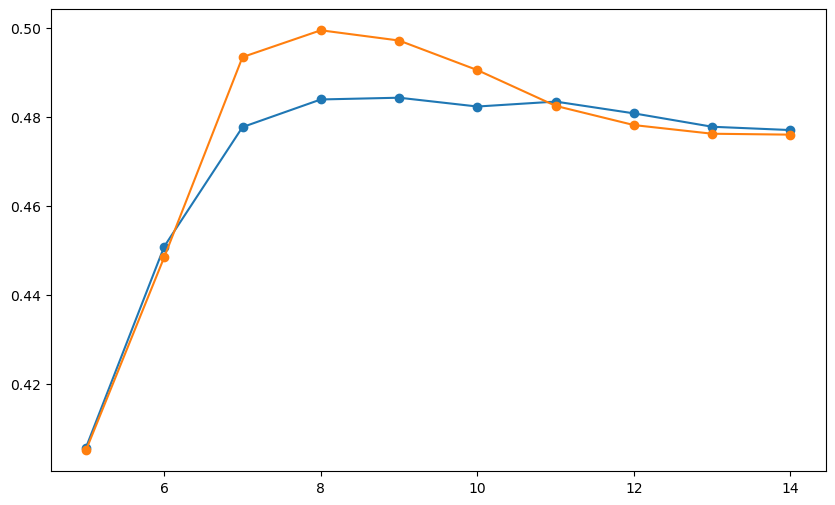

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]

#für tödliche und schwere vs. leichte Unfälle
y = df['UKATEGORIE'].isin([1, 2]).astype(int)
# -> 1 ist schwer oder tödlich, 0 ist leicht

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

import matplotlib.pyplot as plt

# Leere Listen für F1-Scores
f1_scores_log_reg = []
f1_scores_rf = []
roc_scores_log_reg = []
roc_scores_rf = []

max_log_reg_fbeta = 0
max_rf_fbeta= 0
max_log_index = None
max_rf_index = None

weights = range(5, 15)
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)

for i in weights:
    # Logistische Regression
    log_reg = LogisticRegression(max_iter=1000, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    #roc_auc_reg = cross_val_score(log_reg, X, y, cv=kf, scoring='roc_auc')
    #print(f"Weight: {i} F1 Score Logistische Regression (k-fold): { f1_reg.mean()}")
    
    f1_scores_log_reg.append(f1_reg.mean())
    #roc_scores_log_reg.append(roc_auc_reg.mean())
    
   
    

    # Random Forest
    rf_clas = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_rf = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    #roc_auc_rf = cross_val_score(log_reg, X, y, cv=kf, scoring='roc_auc')
    #print(f"Weight: {i} AUC LogREG (k-fold): { roc_auc_reg.mean()}")

    f1_scores_rf.append(f1_rf.mean())
   # roc_scores_rf.append(roc_auc_rf.mean())

    if f1_reg.mean() > max_log_reg_fbeta:
        max_log_reg_fbeta = f1_reg.mean()
        max_log_index = i

    if f1_rf.mean() > max_rf_fbeta:
        max_rf_fbeta = f1_rf.mean()
        max_rf_index = i
        
    

print(f"max logReg an Weight = {max_log_index}: { max_log_reg_fbeta}")
print(f"max RF an Weight = {max_rf_index}: { max_rf_fbeta}")
    
# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(weights, f1_scores_log_reg, marker='o', label='Logistic Regression Fbeta')
plt.plot(weights, f1_scores_rf, marker='o', label='Random Forest Fbeta')
plt.plot(weights, roc_scores_log_reg, marker='o', label='Logistic Regression AUC')
plt.plot(weights, roc_scores_rf, marker='o', label='Random Forest AUC')
plt.title('Fbeta = 2 und AUC für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('Fbeta und AUC - Score')
plt.legend()
plt.grid(True)
plt.show()